In [1]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
conn = sqlite3.connect('InternetSpeed.db')

In [3]:
cur = conn.cursor()

In [4]:
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY RANDOM() LIMIT 10;'

In [5]:
cur.execute(query)

In [6]:
for row in cur:
    print(row)

('2016-11-26 14:30:00.000000',)
('2016-12-09 10:00:00.000000',)
('2016-11-29 10:00:00.000000',)
('2016-11-28 06:00:00.000000',)
('2016-11-25 05:30:00.000000',)
('2016-11-26 05:00:00.000000',)
('2016-11-23 13:00:00.000000',)
('2016-12-06 16:00:00.000000',)
('2016-12-11 02:00:00.000000',)
('2016-11-25 22:30:00.000000',)


In [7]:
query = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1;'
cur.execute(query)

In [8]:
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

In [9]:
columns = [member[0] for member in cur.description]
columns = columns[1:]

In [10]:
columns = [c.replace('_p', '') for c in columns]
columns = [c.replace('_d', '') for c in columns]
columns = [c.replace('_u', '') for c in columns]
columns = list(set(columns))

In [11]:
columns[:10]

['E07000066',
 'E09000017',
 'E07000101',
 'E06000030',
 'E06000027',
 'E07000190',
 'E07000032',
 'E07000222',
 'E07000035',
 'E08000035']

In [12]:
area = columns[0]
print(area)

E07000066


In [13]:
suffix = {'_p':'ping', '_d':'download', '_u':'upload'}
print(suffix.keys())
print(suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Text(0.5, 1.0, 'E07000066')

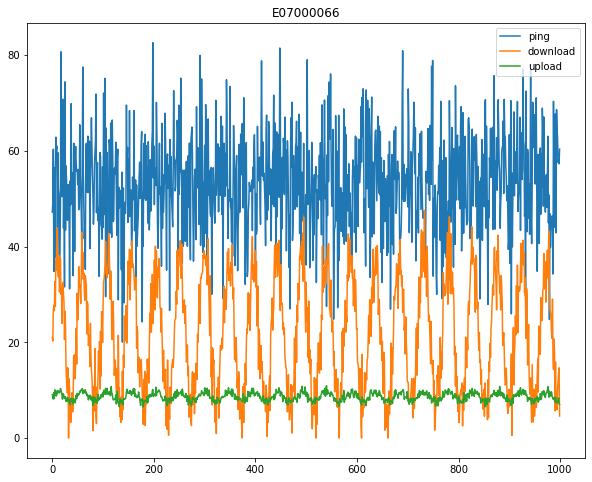

In [14]:
area = columns[0]
plt.figure(figsize=(10, 8))
for s in suffix.keys():
    query = 'SELECT "{}{}" FROM LA_wifi_speed_UK ORDER BY DateTime;'.format(area, s)
    cur.execute(query)
    plt.plot(cur.fetchall(), label=suffix[s])
plt.legend()
plt.title(area)

In [15]:
new_columns = ['Area', 'Average_p', 'Average_u', 'Average_d']
df = pd.DataFrame(columns = new_columns)

In [16]:
for i in range(len(columns)-1):
    tmp_list = []
    tmp_list.append(columns[i])
    for s in suffix.keys():
        query = 'SELECT "{}{}" FROM LA_wifi_speed_UK;'.format(area, s)
        cur.execute(query)
        mean = cur.fetchone()
        tmp_list.append(mean[0])
    df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
df.head()

C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_12096\3418710125.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

,Area,Average_p,Average_u,Average_d
0,E07000066,47.210728,21.02041,9.062896
1,E09000017,47.210728,21.02041,9.062896
2,E07000101,47.210728,21.02041,9.062896
3,E06000030,47.210728,21.02041,9.062896
4,E06000027,47.210728,21.02041,9.062896


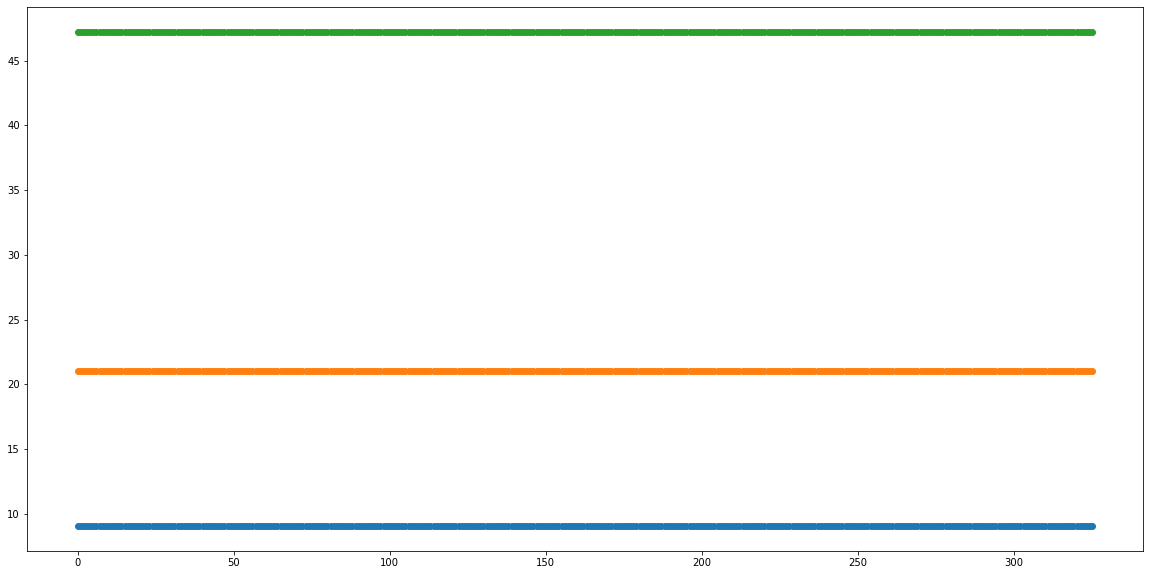

In [17]:
plt.figure(figsize=(20,10))
plt.plot(df.index, df['Average_d'], 'o')
plt.plot(df.index, df['Average_u'], 'o')
plt.plot(df.index, df['Average_p'], 'o')

In [18]:
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass

In [19]:
df.to_sql("average_speed",conn)

326

In [20]:
query_2 = 'SELECT * FROM average_speed'
cur.execute(query_2)
print(cur.fetchone())
print(cur.fetchone())

(0, 'E07000066', 47.2107277662, 21.0204096106, 9.06289643139)
(1, 'E09000017', 47.2107277662, 21.0204096106, 9.06289643139)


In [21]:
conn.close()

In [22]:
conn = sqlite3.connect('InternetSpeed.db')
cur = conn.cursor()
query = 'SELECT * FROM LA_wifi_speed_UK LIMIT 10;'
cur.execute(query)

In [23]:
for row in cur:
    print(row)

(60.7655169913, 39.9572213964, 46.7497555988, 33.4592730205, 61.278089363, 49.6903866035, 55.029870577, 67.2807745453, 53.7212219029, 66.0815253107, 55.6622297293, 65.8525041775, 47.2107277662, 50.6676884172, 64.9261937188, 50.3901521273, 47.8884251118, 51.6084914728, 63.5448221345, 41.5736921166, 51.7651364097, 62.5806028775, 53.7724294788, 47.834585758, 41.2344106662, 38.8510150895, 58.0120871192, 56.884295324, 50.3717855996, 28.3331729869, 60.2367420973, 64.5924932915, 33.8187620293, 58.1962714645, 65.4629003247, 35.7410156002, 22.126744406, 49.3322188084, 57.1041097321, 57.4387137482, 49.6791021761, 48.0176525754, 47.933431591, 61.5722623944, 48.3363876243, 49.4578411771, 38.2779675752, 55.6710255362, 51.1862568722, 45.5399310145, 52.210858629, 59.739632909, 62.4628006366, 65.429297066, 62.986699083, 54.3926624713, 26.2696837429, 36.8311439373, 55.330292248, 42.3352972034, 57.9885841853, 61.0763506111, 35.1367883325, 56.1313513003, 76.389617242, 46.8241142727, 45.1249275978, 42.415

In [24]:
query = 'SELECT * FROM average_speed JOIN LA_population ON LA_population."LA_code"=average_speed.Area'

cur.execute(query)
k = 0
for row in cur:
    if k>10:
        break
    print(row)
    
    k+=1

(0, 'E07000066', 47.2107277662, 21.0204096106, 9.06289643139, 'Basildon', 'E07000066', 174497.0)
(1, 'E09000017', 47.2107277662, 21.0204096106, 9.06289643139, 'Hillingdon', 'E09000017', 273936.0)
(2, 'E07000101', 47.2107277662, 21.0204096106, 9.06289643139, 'Stevenage', 'E07000101', 83957.0)
(3, 'E06000030', 47.2107277662, 21.0204096106, 9.06289643139, 'Swindon', 'E06000030', 209156.0)
(4, 'E06000027', 47.2107277662, 21.0204096106, 9.06289643139, 'Torbay', 'E06000027', 130959.0)
(5, 'E07000190', 47.2107277662, 21.0204096106, 9.06289643139, 'Taunton Deane', 'E07000190', 110187.0)
(6, 'E07000032', 47.2107277662, 21.0204096106, 9.06289643139, 'Amber Valley', 'E07000032', 122309.0)
(7, 'E07000222', 47.2107277662, 21.0204096106, 9.06289643139, 'Warwick', 'E07000222', 137648.0)
(8, 'E07000035', 47.2107277662, 21.0204096106, 9.06289643139, 'Derbyshire Dales', 'E07000035', 71116.0)
(9, 'E08000035', 47.2107277662, 21.0204096106, 9.06289643139, 'Leeds', 'E08000035', 751485.0)
(10, 'E09000006', 4